# Please have a read of the README file.

In [ ]:
from __future__ import print_function
import time
import uiuc_incas_client
from uiuc_incas_client.rest import ApiException
from pprint import pprint
from tqdm import tqdm
from math import ceil

In [ ]:
config = uiuc_incas_client.Configuration()
config.connection_pool_maxsize = 1 # Set to higher value if needs concurrent requests

config.api_key['X-API-KEY'] = 'YOUR_API_KEY'
config.ssl_ca_cert = 'CA_CERT'
config.cert_file = 'YOUR_CERT'
config.key_file = 'YOUR_PRIVATE_KEY'

client = uiuc_incas_client.ApiClient(config)
api_instance = uiuc_incas_client.MessageApi(client)

In [ ]:
id_ = "message:twitter:854367242192125952"

In [ ]:
try:
    # get message
    api_response = api_instance.message_id_get(id_, with_enrichment=True, dev=True) # dev indicates returning of all existing enrichments regardless of meta data existance.
    pprint(api_response)
except ApiException as e:
    print("Exception when calling MessageApi->message_id_get: %s\n" % e)

In [ ]:
try:
    # get enrichments for this message
    api_response = api_instance.message_id_enrichments_get(id_, dev=True)
    pprint(api_response)
except ApiException as e:
    print("Exception when calling MessageApi->message_id_enrichments_get: %s\n" % e)

## Add a new enrichment

In [ ]:
enrichment_name = 'e1' # str
provider_name = 'p1' # str
version = '2.1' # str

In [ ]:
try:
    # add the meta first
    meta = uiuc_incas_client.ArrayEnrichmentMeta(enrichment_name=enrichment_name, enrichment_type='array', provider_name=provider_name, version=version)
    api_instance.message_enrichments_meta_post(meta)
except ApiException as e:
    print("Exception when calling MessageApi->message_enrichments_meta_post: %s\n" % e)

In [ ]:
try:
    # insert a new enrichment
    body = uiuc_incas_client.ArrayEnrichment(
        confidence=[0.5],
        enrichment_name=enrichment_name,
        enrichment_type='array',
        provider_name=provider_name,
        version=version,
        attribute_value=[1]
    )
    api_instance.message_id_enrichments_post(body, id_)
    
    # Show the content again
    api_response = api_instance.message_id_enrichments_get(id_, dev=True)
    pprint(api_response)
except ApiException as e:
    print("Exception when calling MessageApi->message_id_enrichments_post: %s\n" % e)

In [ ]:
try:
    # update the enrichment
    body = uiuc_incas_client.ArrayEnrichment(
        confidence=[0.5, 0.5],
        enrichment_name=enrichment_name,
        enrichment_type='array',
        provider_name=provider_name,
        version=version,
        attribute_value=[1, 2]  # change the value
    )
    api_instance.message_id_enrichments_put(body, id_)
    
    # Show the content again
    api_response = api_instance.message_id_enrichments_get(id_, dev=True)
    pprint(api_response)
except ApiException as e:
    print("Exception when calling MessageApi->message_id_enrichments_put: %s\n" % e)

## Delete an enrichment

In [ ]:
try:
    # First delete the meta
    api_instance.message_enrichments_meta_delete(enrichment_name, provider_name, version)
    
    # Here we use a batch delete, single delete is also available
    body = uiuc_incas_client.MessageEnrichmentsBatchDeleteBody(
        ids=[id_],
        enrichment_name=enrichment_name,
        provider_name=provider_name,
        version=version
    )
    api_instance.message_enrichments_batch_delete(body)
except ApiException as e:
    print("Exception when calling MessageApi->message_enrichments_batch_delete: %s\n" % e)

In [ ]:
try:
    # get the current message number
    api_response = api_instance.message_count_get(media_type='Twitter')
    pprint(api_response)
except ApiException as e:
    print("Exception when calling MessageApi->message_count_get: %s\n" % e)

In [ ]:
try:
    # get a batch of messages with ids
    body = uiuc_incas_client.MessageBatchGetBody(
        ids=["message:twitter:0ab3ba38dfceeb5f3fe913900229a88ee3c45fb1", "message:twitter:15ca66fd52c3fea8b3260120e79f09c87d88aec1"],
        dev=False,
        with_enrichment=True
    )
    api_response = api_instance.message_batch_get(body)
    pprint(api_response)
except ApiException as e:
    print("Exception when calling MessageApi->message_batch_get: %s\n" % e)

## Get all id list

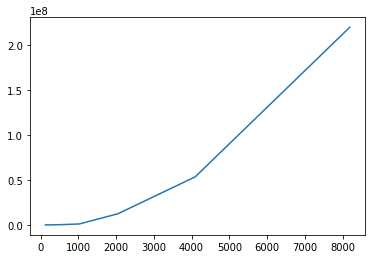

In [2]:
msg_api_instance = uiuc_incas_client.MessageApi(client)
actor_api_instance = uiuc_incas_client.ActorApi(client)

try:
    actors = []
    bsize = 5000
    total_act = actor_api_instance.actor_count_get(media_type='Twitter', entity_type='Person')
    print(total_act)
    for begin in tqdm(range(0, total_act, bsize), total=ceil(total_act / bsize)):
        ids = [x.actor_id for x in actor_api_instance.actor_list_get(begin=begin, end=min(begin + bsize, total_act), media_type='Twitter', entity_type='Person')]
        actors.extend(actor_api_instance.actor_batch_get(body=uiuc_incas_client.ActorBatchGetBody(
            ids=ids, 
            with_enrichment=True)))
except ApiException as e:
    print("Exception when calling ActorApi: %s\n" % e)